In [74]:
from Bio import SeqIO
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Функция для подсчёта частоты GC

In [75]:
def gc_content(file_name, fast=False, plot=True):
    if fast:
        cnt = 0
    gc_counter = {round(0.01 * index, 2)  : 0 for index in range(0, 101)}
    for index_file, record in enumerate(SeqIO.parse(file_name, "fastq")):
        seq = record.seq
        tempory_gc = Counter(seq)
        tempory_gc = round((tempory_gc['G'] + tempory_gc['C']) / len(seq), 2)
        gc_counter[tempory_gc] += 1
        if fast:
            cnt += 1
            if cnt == 10**5:
                break
    if plot:
        gc_plot(gc_counter)
    else:
        return gc_counter
def gc_plot(dict_counter):
    x, y = np.array(list(dict_counter.keys())), np.array(list(dict_counter.values()))
    sns.scatterplot(x, y)
    plt.axvline(x=x[np.argmax(y)], color='black', linestyle='--')

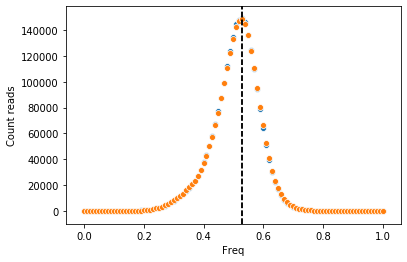

In [76]:
gc_content('100x.1.fastq', fast=False, plot=True)
gc_content('100x.2.fastq', fast=False, plot=True)
plt.xlabel('Freq')
plt.ylabel('Count reads');

### Функция для подсчёта качества нуклеотида в зависимости от позиции в риде

In [82]:
def quality_content(file_name, fast=False, plot=True):
    if fast:
        cnt = 0
    qual_counter = {}
    for index_file, record in enumerate(SeqIO.parse(file_name, "fastq")):
        quality = record.letter_annotations["phred_quality"]
        for index, qual in enumerate(quality):
            if index in qual_counter:
                qual_counter[index]['qual'] += qual
                qual_counter[index]['n_qual'] += 1
            else:
                qual_counter[index] = {'qual' : qual, 'n_qual' : 1}
        if fast:
            cnt += 1
            if cnt == 10**4:
                break
    if plot:
        qual_plot(qual_counter)
    else:
        return qual_counter
def qual_plot(dict_counter):
    x, y = list(dict_counter.keys()), list(map(lambda x: 10 ** (-x['qual'] / (x['n_qual'] * 10)), dict_counter.values()))
    sns.scatterplot(x, y)

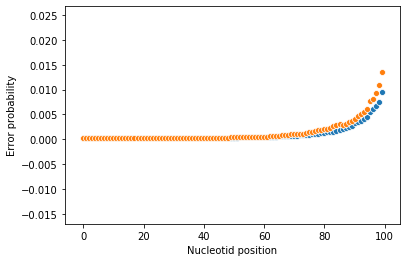

In [83]:
quality_content('100x.1.fastq')
quality_content('100x.2.fastq')
plt.xlabel('Nucleotid position')
plt.ylabel('Error probability');